In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 10 - Solubility Descriptor\delaney_solubility_with_descriptors.csv')

In [3]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [4]:
X = df.drop(columns = 'logS')
y = df.logS

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.2, random_state= 100)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [8]:
lr_pred

array([-3.24562404e+00, -7.89147408e+00, -2.32220593e+00, -2.12665471e+00,
       -1.90106861e+00, -6.25115957e-01, -6.51034998e-01, -1.71654673e-01,
       -5.71588379e+00, -3.96393711e+00, -3.80678810e+00, -2.15079463e+00,
       -1.64136819e+00, -1.58937790e+00, -4.73928135e+00, -1.74427246e+00,
       -1.58921726e+00, -3.10239419e+00, -3.53969006e+00, -5.75420128e+00,
       -3.12169347e+00, -4.99190195e+00, -5.64166492e+00, -2.32959044e+00,
       -4.54626671e+00, -4.92337428e+00, -3.31254883e+00, -4.43154085e+00,
       -4.08513934e+00,  6.31625983e-01, -1.09952571e+00, -4.33323031e+00,
       -2.71537396e+00, -1.62465944e+00, -2.49846296e-01, -1.81811807e+00,
       -2.68631327e+00, -3.20043010e+00, -5.28032812e+00, -1.57610580e+00,
       -1.31297965e+00, -1.86875580e+00, -6.57980298e+00, -8.00631049e+00,
       -5.75920494e+00, -4.10364002e+00, -3.35574198e+00,  1.77702502e+00,
        4.66532576e-01, -2.22475894e+00, -1.97735660e+00, -4.92337428e+00,
        9.97315870e-01, -

In [9]:
mse_lr = mean_squared_error(y_test, lr_pred)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)


In [10]:
lr_results = pd.DataFrame(['Linear Regression', mse_lr, rmse_lr, mae_lr, r2_lr]).transpose()
lr_results.columns = ['Method', 'MSE', 'RMSE', 'MAE', 'R2']
lr_results

,Method,MSE,RMSE,MAE,R2
0,Linear Regression,1.099237,1.048445,0.802672,0.749698


In [11]:
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)
rfr_pred = rfr.predict(X_test_scaled)

In [12]:
rfr_pred

array([-3.4938    , -8.22955833, -1.66961   , -1.53597333, -1.1729    ,
       -1.27742   , -0.0423    , -1.7257    , -5.87639   , -3.60913   ,
       -4.23834667, -1.5438    , -1.8739    , -1.2605    , -4.39368   ,
       -0.95543167, -1.1669    , -2.85520333, -4.03689   , -5.50711   ,
       -2.49374   , -5.47363   , -6.29026   , -3.52833   , -4.49185   ,
       -4.95454833, -4.17928583, -4.29862667, -4.135195  ,  1.0394    ,
       -1.80256   , -4.08652   , -2.80163976, -1.0808    , -1.00662   ,
       -2.001     , -2.11958   , -2.45768   , -4.79954   , -1.24698   ,
       -0.3354    , -1.56252167, -6.77642   , -7.27885   , -5.71704   ,
       -4.12707   , -3.91147   , -0.54005   , -1.91458   , -1.714     ,
       -1.3139    , -4.95454833,  0.17486   , -2.62099   , -5.8728    ,
       -1.22260667, -8.22955833, -0.82080667, -1.35628   , -5.47363   ,
       -1.87206   , -2.17102   , -2.417455  , -2.59288167,  0.3033    ,
       -1.2656    , -2.82858333, -3.66805   , -1.91669   , -3.69

In [13]:
mse_rfr = mean_squared_error(y_test, rfr_pred)
rmse_rfr = np.sqrt(mse_rfr)
mae_rfr = mean_absolute_error(y_test, rfr_pred)
r2_rfr = r2_score(y_test, rfr_pred)

In [14]:
rfr_results = pd.DataFrame(['Random Forest', mse_rfr, rmse_rfr, mae_rfr, r2_rfr]).transpose()
rfr_results.columns = ['Method', 'MSE', 'RMSE', 'MAE', 'R2']
rfr_results

,Method,MSE,RMSE,MAE,R2
0,Random Forest,0.705214,0.83977,0.637576,0.839419


In [15]:
df_models = pd.concat([lr_results, rfr_results], axis =0)
df_models

,Method,MSE,RMSE,MAE,R2
0,Linear Regression,1.099237,1.048445,0.802672,0.749698
0,Random Forest,0.705214,0.83977,0.637576,0.839419


In [16]:
df_models.reset_index(drop = True)

,Method,MSE,RMSE,MAE,R2
0,Linear Regression,1.099237,1.048445,0.802672,0.749698
1,Random Forest,0.705214,0.83977,0.637576,0.839419


In [18]:
df_models.set_index('Method')

,MSE,RMSE,MAE,R2
Method,,,,
Linear Regression,1.099237,1.048445,0.802672,0.749698
Random Forest,0.705214,0.83977,0.637576,0.839419


In [20]:
rfr_pred_train = rfr.predict(X_train_scaled)
lr_pred_train = lr.predict(X_train_scaled)

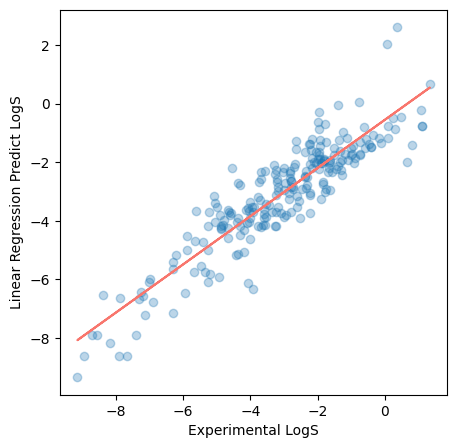

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(x = y_train, y = lr_pred_train, alpha = 0.3)

plt.ylabel('Linear Regression Predict LogS')
plt.xlabel('Experimental LogS')

z = np.polyfit(y_train, lr_pred_train, 1)  # 1 = linear fit
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')

plt.show()


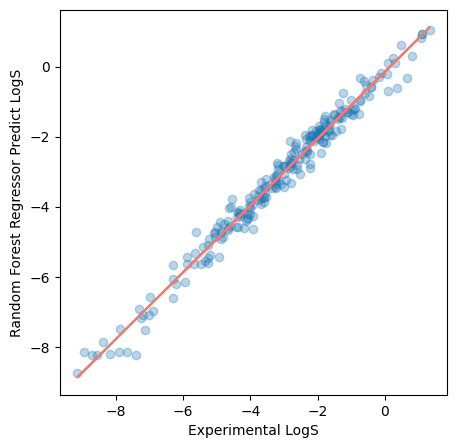

[]

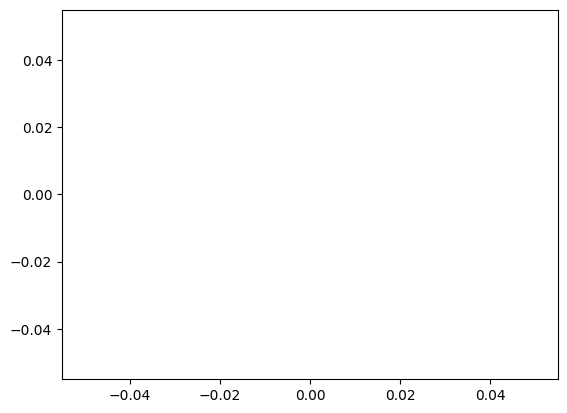

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(x = y_train, y = rfr_pred_train, alpha = 0.3)

plt.ylabel('Random Forest Regressor Predict LogS')
plt.xlabel('Experimental LogS')

z = np.polyfit(y_train, rfr_pred_train, 1)  # 1 = linear fit
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')

plt.show()

plt.plot()